# Prediction of Survival Rate in Titanic Dataset
<br>**by Prince Joseph Erneszer Javier**
<br>MSDS Asian Institute of Management


## Executive Summary

The goal of this analysis was to find out the predictors of whether or not a Titanic passenger would have survived the Titanic accident. The second goal was to evaluate multiple classification algorithms and determine the most accurate and interpretable.

Titanic dataset was provided by AIM ACCESS lab. The dataset was cleaned and run on multiple classification models. The impact of min-max and standard scaling on the dataset to accuracy were also explored. The minimum target accuracy (1.25 X Proportional Chance Criterion) is 66%.

The model that yielded the highest accuracy was gradient boosting machines (GBM) with around 81.2% accuracy using learning rate of 0.1 and maximum depth of 6. However, the downside was it lacked interpretability. 

The model that yielded second best accuracy was random forest with accuracy of 80.8%. The highest predictors were ticket number and sex. 

The third was nonlinear SVM with RBF kernel and C=0.75 and min-max scaled dataset which yielded 80.8% accuracy. However, the best predictors were not determined for this model.

Fourth, decision tree yielded 80.3% accuracy at maximum depth of 3. The advantage of the decision tree was its interpretability as a tree diagram could be constructed of the step-by-step process in classification process.

Dimensionally reducing the dataset prior to running in GBM and random forest decreased accuracy.

From this analysis, it was found that sex was the highest predictor of whether or not a person would survive the accident. The proportion of females in the survivors were higher than the males, whereas the proportion of females in the non-survivors were much less than the males.

For the models, GBM proved most accurate in classifying and may be used if the goal is merely for prediction. However, for the balance between interpretability and prediction, decision trees classifier is deemed preferrable.

## Description of Dataset

AIM provided the dataset for this analysis. The columns in the dataset are:
1. pclass - ticket class (1 - 1st, 2 - 2nd, 3 - 3rd)
* name - name of passenger
* sex - sex of passenger
* age - age of passenger
* sibsp - no. of siblings or spouses aboard the Titanic
* parch - no. of parents or children aboard
* ticket - ticket number
* fare - passenger fare
* cabin - cabin number
* embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* target - whether the passenger survived or not (1 - yes, 0 - no)

Descriptions were sourced from https://github.com/awesomedata/awesome-public-datasets/issues/351

## Dataset Preparation

We first loaded the `titanic.xls` dataset in a dataframe.

In [1]:
import pandas as pd
import numpy as np
df0 = pd.read_excel('titanic.xls')

We checked the first 5 rows and last 5 rows below.

In [2]:
display(df0.head())
display(df0.tail())

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,target
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,target
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,0
1308,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,0


The dataset contains 1,309 rows and 11 columns.

In [3]:
df0.shape

(1309, 11)

Among the columns `age`, `cabin`, and `embarked` contain null values.

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
target      1309 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


The original dataset contains 10 features and 1 target column. Among these features, `name` was dropped because it merely identifies each individual and doesn't inform us of information about the individual.

In [5]:
df1 = df0.drop('name', axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
target      1309 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


`cabin` column contains too many null values. This too was dropped.

In [6]:
df2 = df1.drop('cabin', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
target      1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


20% of `age` are null values. This was decided to be retained, but missing values were imputed. Similarly, since only 2 of values in `embarked` are missing, these too were imputed.

In [7]:
len(df2[df2.age.isnull()])/len(df2)*100

20.091673032849503

We defined a class to impute or "fill in" missing values with the median per column for numerical data and mode for categorical data.

In [8]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """

    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
                               if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
                              index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

Missing values were imputed and the new dataset was saved in a new dataframe.

In [9]:
df3 = DataFrameImputer().fit_transform(df2)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
pclass      1309 non-null int64
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1309 non-null float64
embarked    1309 non-null object
target      1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.1+ KB


In [11]:
df3.ticket.head(10)

0       24160
1      113781
2      113781
3      113781
4      113781
5       19952
6       13502
7      112050
8       11769
9    PC 17609
Name: ticket, dtype: object

`ticket` values contain numerical and mixed letters and numerical values. We split the numerical values from the letter values and saved in separate columns `tick_code` and `tick_num`

In [12]:
import re

pat = re.compile('\d.*')
tick_code = pd.DataFrame(df3.ticket.astype(str).str.replace(pat, '').tolist(), columns =['tick_code'])

In [13]:
pat = re.compile('[^\d]')
tick_num = pd.DataFrame(df3.ticket.astype(str).str.replace(pat, '').str.strip(
    '').tolist(), columns=['tick_num'])

In [14]:
df4 = pd.concat([df3, tick_num, tick_code], axis=1).drop('ticket', axis=1)
display(df4.head())
display(df4.tail())

,pclass,sex,age,sibsp,parch,fare,embarked,target,tick_num,tick_code
0,1,female,29.0000,0,0,211.3375,S,1,24160,
1,1,male,0.9167,1,2,151.5500,S,1,113781,
2,1,female,2.0000,1,2,151.5500,S,0,113781,
3,1,male,30.0000,1,2,151.5500,S,0,113781,
4,1,female,25.0000,1,2,151.5500,S,0,113781,


,pclass,sex,age,sibsp,parch,fare,embarked,target,tick_num,tick_code
1304,3,female,14.5,1,0,14.4542,C,0,2665,
1305,3,female,28.0,1,0,14.4542,C,0,2665,
1306,3,male,26.5,0,0,7.2250,C,0,2656,
1307,3,male,27.0,0,0,7.2250,C,0,2670,
1308,3,male,29.0,0,0,7.8750,S,0,315082,


In [15]:
df4.tick_num[df4.tick_num == ''] = 0
df4['tick_num'] = df4.tick_num.astype('int')

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We checked the unique categorical variables in the columns `target`, `pclass`, `sex`, `embarked`, and `tick_code`. 

In [16]:
from collections import Counter
cols_ = ['target', 'pclass', 'sex', 'embarked', 'tick_code']
for c in cols_:
    counts = Counter(df4[c])

    print("Counts per categorical value in %s" % c)
    display(pd.DataFrame.from_dict(counts, orient='index', columns=['counts']))

Counts per categorical value in target


,counts
1,500
0,809


Counts per categorical value in pclass


,counts
1,323
2,277
3,709


Counts per categorical value in sex


,counts
female,466
male,843


Counts per categorical value in embarked


,counts
S,916
C,270
Q,123


Counts per categorical value in tick_code


,counts
,957
PC,92
W.E.P.,2
WE/P,2
F.C.,3
P/PP,2
C.A.,46
C.A./SOTON,1
S.O.P.,1
F.C.C.,9


We observed that `tick code` have some variables that are the same but are reported differently. This was cleaned by removing `.` and converting variables to lower case.

In [17]:
df5 = df4.copy()
df5['tick_code'] = df4['tick_code'].str.replace('.', '').str.lower().str.strip()

In [18]:
df = df5.copy()

## Exploratory Data Analysis

In [19]:
import matplotlib.pyplot as plt

We first investigated the counts per categorical data, and the corresponding proportions. Some initial findings are:

1. The proportion of survivors to non-survivors in the dataset is 38:61
2. 24% are first class passengers, 21% are 2nd class, and 54% are 3rd class passengers
3. 35% are female while 64% are male
4. 70% embarked at Southampton, 21% at Cherbourg, and 9% at Queenstown.

In [20]:
cols_ = ['target', 'pclass', 'sex', 'embarked', 'tick_code']
for c in cols_:
    counts = Counter(df[c])

    print("Counts per categorical value in %s" % c)
    
    a = pd.DataFrame.from_dict(counts, orient='index', columns=['counts'])
    a['%'] = a.values/np.sum(a.values)*100
    
    display(a)

Counts per categorical value in target


,counts,%
1,500,38.197097
0,809,61.802903


Counts per categorical value in pclass


,counts,%
1,323,24.675325
2,277,21.161192
3,709,54.163484


Counts per categorical value in sex


,counts,%
female,466,35.599694
male,843,64.400306


Counts per categorical value in embarked


,counts,%
S,916,69.977082
C,270,20.626432
Q,123,9.396486


Counts per categorical value in tick_code


,counts,%
,957,73.109244
pc,92,7.028266
wep,2,0.152788
we/p,2,0.152788
fc,3,0.229183
p/pp,2,0.152788
ca,68,5.194805
ca/soton,1,0.076394
sop,1,0.076394
fcc,9,0.687548


From the charts below, we found that **there are far more males than females for non-survivors. And there are more females than males for survivors.**

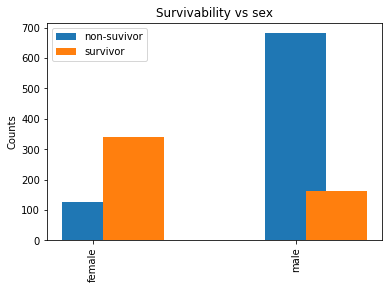

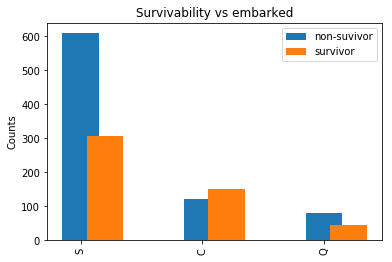

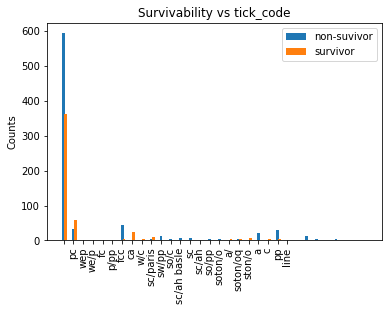

In [21]:
labels = ['non-suvivor', 'survivor']
cols_ = ['sex', 'embarked', 'tick_code']
for j in range(len(cols_)):
    c = cols_[j]
    for i in range(2):
        _ = Counter(df[c][df['target'] == i])
        plt.bar(np.array(range(len(_.keys())))+i/5, _.values(), label=labels[i], width=0.3)
        plt.xticks(range(len(_.keys())), _.keys(), rotation='vertical')
        plt.title("Survivability vs %s" % c)
        plt.ylabel('Counts')
        plt.legend()
    plt.show()

Looking at the summary statistics, we gleaned that:
1. The mean age of passengers was 29.5 years
2. The mean number of siblings/spouses on board per passenger was 0.5
3. The mean number of parents and children on board per passenger was 0.4
4. The average fare was 33.3
5. 75% of passengers have ticket numbers below 347082

In [22]:
df.describe()

,pclass,age,sibsp,parch,fare,target,tick_num
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1.309000e+03
mean,2.294882,29.503183,0.498854,0.385027,33.281086,0.381971,6.579261e+05
std,0.837836,12.905246,1.041658,0.865560,51.741500,0.486055,3.109678e+06
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.488800e+04
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.129010e+05
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,3.470820e+05
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,2.310129e+07


We then plotted the histograms of each variable and scatterplots of two variables. Blue dots indicate non-survivors and orange dots indicate survivors. 

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


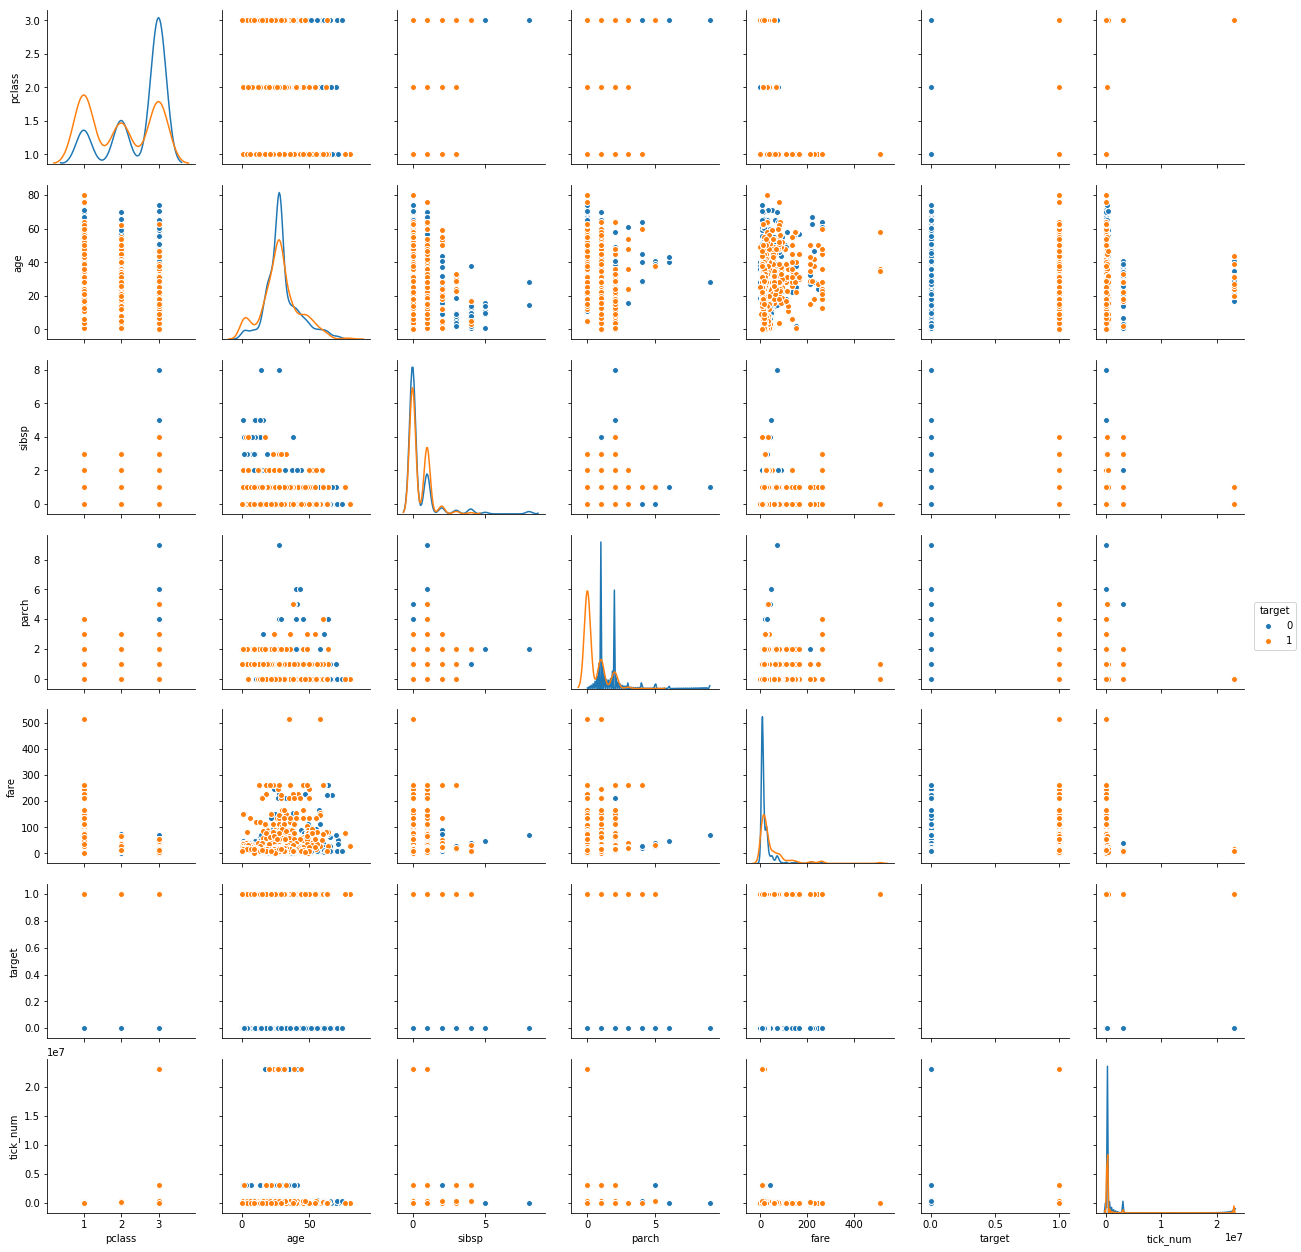

In [23]:
import seaborn as sns

sns.pairplot(df, hue='target', diag_kind='kde');

Looking at the histograms and scatterplots, we can see that **no single variable can clearly separate the survivors from the non-survivors, except possibly for the number of children or parents on board, `parch`.**

## Dummification of Categorical Data

In order to use the classification models, the values in the dataframe have to be numerical. **The categorical feature values were converted to numerical values using one-hot encoding through `get_dummies` method** which converts all unique values into separate "features" or columns which may take only 0 or 1. 0 if the observation/sample/data point does not possess the feature and 1 if it does. This is appropriate because it's not possible to tell which categorical value is better over the other. The 1s and 0s generated by one-hot encoding merely act like an indicator whether or not the feature applies for a certain data point.

**In this case, we we applied one-hot encoding for `sex`, `embarked`, and `tick_code`.**

In [24]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,target,tick_num,tick_code
0,1,female,29.0000,0,0,211.3375,S,1,24160,
1,1,male,0.9167,1,2,151.5500,S,1,113781,
2,1,female,2.0000,1,2,151.5500,S,0,113781,
3,1,male,30.0000,1,2,151.5500,S,0,113781,
4,1,female,25.0000,1,2,151.5500,S,0,113781,


In [25]:
sex_ = pd.get_dummies(df[['sex']], drop_first=True)
embarked_ = pd.get_dummies(df[['embarked']], drop_first=True)
tick_code_ = df.tick_code.str.get_dummies(sep='/')

In [26]:
dums = pd.concat([sex_, embarked_, tick_code_], axis=1)
dums.head()

,sex_male,embarked_Q,embarked_S,a,ah,ah basle,aq,c,ca,fa,...,so,soc,sop,soton,sp,ston,sw,w,we,wep
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The cleaned dataframe after removing `target` and after one-hot encoding was saved in `X_clean`.

In [27]:
_ = df.drop(['tick_code', 'embarked', 'sex', 'target'], axis=1)
X_clean = pd.concat([_, dums], axis=1)
X_clean.head()

,pclass,age,sibsp,parch,fare,tick_num,sex_male,embarked_Q,embarked_S,a,...,so,soc,sop,soton,sp,ston,sw,w,we,wep
0,1,29.0000,0,0,211.3375,24160,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.9167,1,2,151.5500,113781,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0000,1,2,151.5500,113781,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30.0000,1,2,151.5500,113781,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,25.0000,1,2,151.5500,113781,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The target values were saved in `y`.

In [28]:
y = df.target
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

## Classification

### Proportional Chance Criterion
The Proportional Chance Criterion (PCC) measures the chance of correctly classifying a datapoint based on chance alone. As a rule of thumb, to say that our model works, we need to exceed prediction accuracy of 1.25 x PCC. In this case, **the minimum target classification accuracy is 66%.**

Population per class:


,Counts
1,500
0,809


1.25 * Proportion Chance Criterion: 65.98%


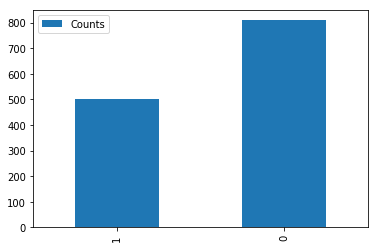

In [29]:
state_counts = Counter(y)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Counts']
df_state.plot(kind='bar')
print("Population per class:")
display(df_state)
num = (df_state['Counts'] / df_state['Counts'].sum())**2
print(
    "1.25 * Proportion Chance Criterion: {0:.2f}%".format(1.25 * 100 * num.sum()))

We used the following classification functions (We call this code JUDAS 7-in-1 credit to Jude Teves and Prof. Christopher Monterola). We run the each algorithm ten times and get the average accuracies.

Using JUDAS, the following models were run:

1. k Nearest Neighbors - parameter is n neighbors (influence generalizability)
2. Logistic Regression - parameter is alpha is a regularization parameter that affects the influence of each feature on the classifier
3. Linear Support Vector Machines (SVM) - parameter is C which controls how much influence each datapoint has on the datapoints separator (hyperplane)
4. Nonlinear Support Vector Machines (NSVM) - parameters are gamma and C (similar to linear SVM)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Number_trials=50

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model 
            clf.fit(X_train, y_train)    
            acc_train.append(clf.score(X_train, y_train))
            acc_test.append(clf.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    #return n_neighbor, accuracy
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'Not Now']

def train_logistic(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [0.01]

    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            lr = LogisticRegression(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))
            if alpha_run == 0.1:
                coefs=lr.coef_ 
                weighted_coefs.append(coefs) #append all the computed coefficients per trial
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
    
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials 
    #print(mean_coefs) 
    score = np.mean(score_test, axis=0)
    #return score.shape
    #coefs = lr.coef_
    #return C value, accuracy, column/feature name
    
    if scaler == 'ON':
        top_predictor = 'DEBUGGING'
    if scaler == 'OFF':
        top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
        abs_mean_coefs = np.abs(mean_coefs[0,:])
        coefs_count = len(abs_mean_coefs)
        fig, ax = plt.subplots(figsize=(3,8))
        ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        #ax.barh(np.arange(coefs_count), mean_coefs[0, np.argsort(abs_mean_coefs)])
        ax.set_yticks(np.arange(coefs_count))
        ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
        ax.set_title('Logistic %s'%reg)
        
    return ['Logistic ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [0.01]
    
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svc = LinearSVC(C=alpha_run, penalty=reg, loss='squared_hinge', dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svc = LinearSVC(C=alpha_run, penalty=reg).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
            if alpha_run == 0.1:
                coefs = svc.coef_
                weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    
    #if scaler == 'ON':
    #    top_predictor = 'DEBUGGING'
    #if scaler == 'OFF':
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,8))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        #ax.barh(np.arange(coefs_count), mean_coefs[0, np.argsort(abs_mean_coefs)])
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    ax.set_title('Linear SVM %s'%reg)
        #print(X.columns(np.arg(np.abs(mean_coefs)))
        #print(np.abs(mean_coefs))
    #return score
    #return C value, accuracy, column/feature name
    #y_pred = lsvc_l1.predict(X_test)
    #confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    #print(confmat)
    return ['Linear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor]


def train_Nsvm(X, y, reg):
    #CC = [.1]
    #C = [0.01]
    CC = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in CC:
            svm = SVC(kernel='rbf', gamma=alpha_run, C=10)
            svc=svm.fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
            #if alpha_run == 0.01:
            #    coefs = svc.coef_
             #   weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    top_predictor ='Not Now'
   
    return ['Nonlinear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(CC[np.argmax(score)]), top_predictor]


def train_Nsvmpoly(X, y, reg):

    CC = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in CC:
            svm = SVC(kernel='poly',degree=2,coef0=1, C=alpha_run)
            svc=svm.fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
            #if alpha_run == 0.01:
            #    coefs = svc.coef_
             #   weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    
    top_predictor='Not Now'
    return ['Nonlinear SVM ({0})'.format(reg), np.amax(score), \
            'C = {0}'.format(CC[np.argmax(score)]), top_predictor]


['kNN', 0.6775, 'N_Neighbor = 3', 'Not Now']
['Logistic (l2)', 0.6453658536585364, 'C = 0.0001', 'age']
['Logistic (l1)', 0.7886585365853658, 'C = 1.5', 'sex_male']
['Linear SVM (l2)', 0.5841463414634144, 'C = 5', 'sex_male']
['Linear SVM (l1)', 0.7873170731707316, 'C = 0.75', 'sex_male']


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['Nonlinear SVM (rbf)', 0.6832926829268294, 'C = 0.001', 'Not Now']


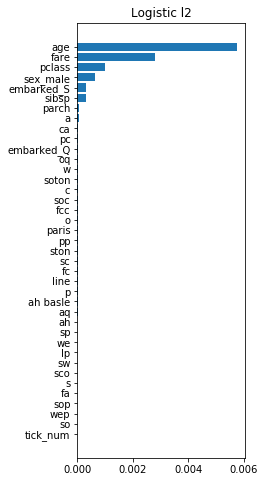

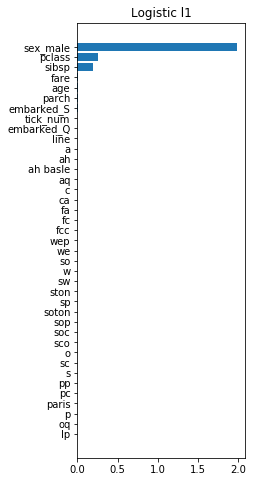

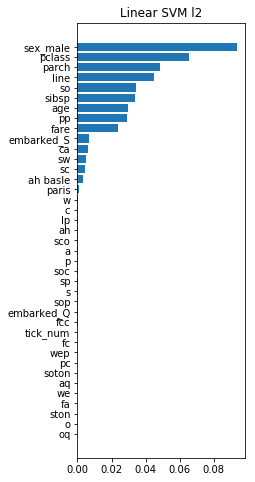

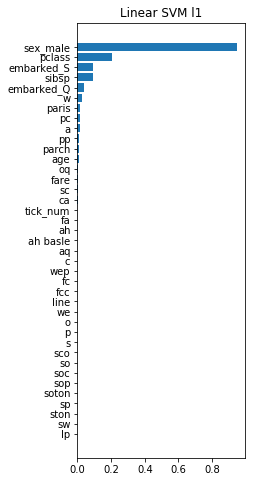

In [31]:
# %%time
feature_names = X_clean.columns

X = X_clean[feature_names]

scaler='OFF'

a = train_knn(X,y)
print(a)
b = train_logistic(X,y,reg='l2')
print(b)
c = train_logistic(X,y,reg='l1')
print(c)
d = train_svm(X,y,reg='l2')
print(d)
e = train_svm(X,y,reg='l1')
print(e)
f = train_Nsvm(X,y,reg='rbf')
print(f)
# g = train_Nsvmpoly(X,y,reg='poly')
# print(g)


**Without using any scaling, the highest accuracy was obtained from Logistic Regression with L1 penalty. The best predictor is `sex_male`.**

In [32]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
# df2.loc[6] = g
df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,0.677500,N_Neighbor = 3,Not Now
1,Logistic (l2),0.645366,C = 0.0001,age
2,Logistic (l1),0.788659,C = 1.5,sex_male
3,Linear SVM (l2),0.584146,C = 5,sex_male
4,Linear SVM (l1),0.787317,C = 0.75,sex_male
5,Nonlinear SVM (rbf),0.683293,C = 0.001,Not Now


### Scaling

Two scaling methods were used: min-max scaling or standard scaling. Min-max scaling scales the values in a column by the range of values in that column (minimum values to maximum values). Standard scaling scales the values in a column by the mean and standard deviation of the values in that column.

#### Min-Max Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

['kNN', 0.7979268292682928, 'N_Neighbor = 28', 'Not Now']
['Logistic (l2)', 0.7871341463414632, 'C = 3', 'sex_male']
['Logistic (l1)', 0.7877439024390241, 'C = 1.5', 'sex_male']
['Linear SVM (l2)', 0.7868902439024389, 'C = 0.4', 'sex_male']
['Linear SVM (l1)', 0.7876829268292684, 'C = 0.75', 'sex_male']


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['Nonlinear SVM (rbf)', 0.8075609756097564, 'C = 0.75', 'Not Now']


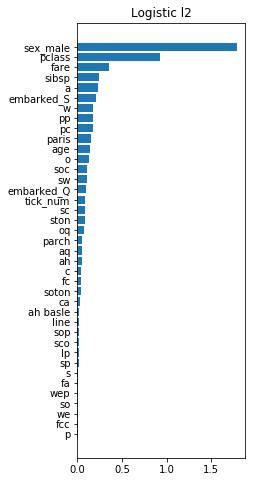

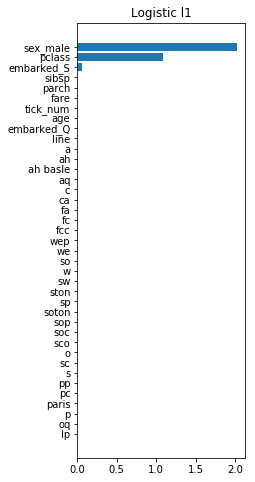

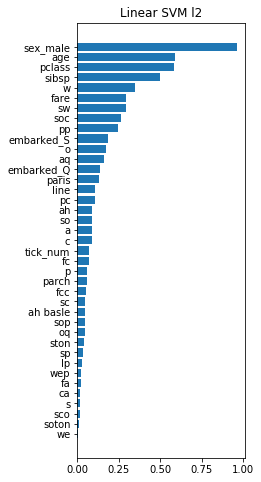

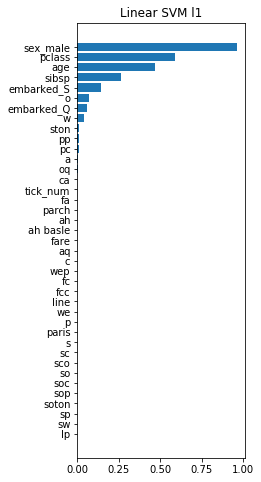

In [35]:
# %%time

feature_names = X.columns

X = X_clean[feature_names]

sscaler = MinMaxScaler()
X = sscaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)

a = train_knn(X,y)
print(a)
b = train_logistic(X,y,reg='l2')
print(b)
c = train_logistic(X,y,reg='l1')
print(c)
d = train_svm(X,y,reg='l2')
print(d)
e = train_svm(X,y,reg='l1')
print(e)
f = train_Nsvm(X,y,reg='rbf')
print(f)
# g = train_Nsvmpoly(X,y,reg='poly')
# print(g)

**With min-max scaling, the highest accuracy was obtained from Nonlinear SVM with radial basis function kernel.** No top predictor was determined using this model. The best predictor in all other models aside from kNN is still `sex_male`.

In [36]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
# df2.loc[6] = g
df2


,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,0.797927,N_Neighbor = 28,Not Now
1,Logistic (l2),0.787134,C = 3,sex_male
2,Logistic (l1),0.787744,C = 1.5,sex_male
3,Linear SVM (l2),0.786890,C = 0.4,sex_male
4,Linear SVM (l1),0.787683,C = 0.75,sex_male
5,Nonlinear SVM (rbf),0.807561,C = 0.75,Not Now


#### Standard Scaling

['kNN', 0.7897560975609754, 'N_Neighbor = 17', 'Not Now']
['Logistic (l2)', 0.7835975609756096, 'C = 0.2', 'sex_male']
['Logistic (l1)', 0.7866463414634146, 'C = 0.2', 'sex_male']
['Linear SVM (l2)', 0.7848780487804876, 'C = 0.01', 'sex_male']
['Linear SVM (l1)', 0.7871341463414635, 'C = 0.1', 'sex_male']


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['Nonlinear SVM (rbf)', 0.790609756097561, 'C = 0.1', 'Not Now']


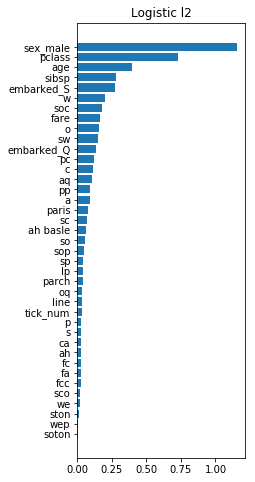

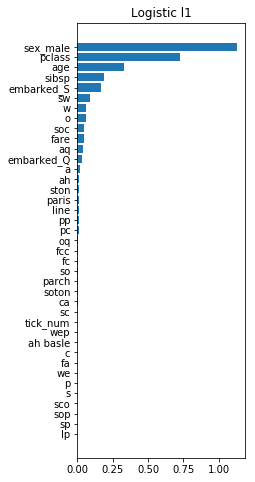

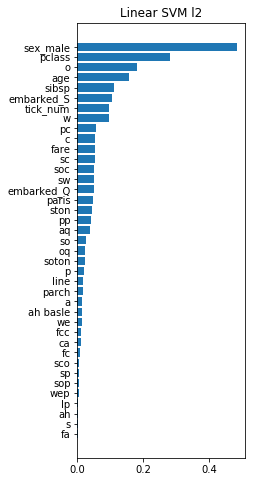

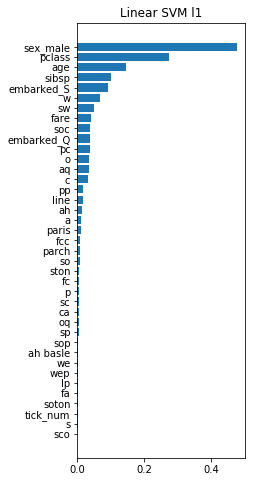

In [37]:
# %%time

feature_names = X.columns

X = X_clean[feature_names]

sscaler = StandardScaler()
X = sscaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)

a = train_knn(X,y)
print(a)
b = train_logistic(X,y,reg='l2')
print(b)
c = train_logistic(X,y,reg='l1')
print(c)
d = train_svm(X,y,reg='l2')
print(d)
e = train_svm(X,y,reg='l1')
print(e)
f = train_Nsvm(X,y,reg='rbf')
print(f)
# g = train_Nsvmpoly(X,y,reg='poly')
# print(g)

**With standard scaling, the highest accuracy was obtained from Nonlinear SVM with radial basis function kernel.** No top predictor was determined using this model. The best predictor in all other models aside from kNN is still `sex_male`.

In [38]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
df2.loc[4] = e
df2.loc[5] = f
# df2.loc[6] = g
df2


,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,kNN,0.789756,N_Neighbor = 17,Not Now
1,Logistic (l2),0.783598,C = 0.2,sex_male
2,Logistic (l1),0.786646,C = 0.2,sex_male
3,Linear SVM (l2),0.784878,C = 0.01,sex_male
4,Linear SVM (l1),0.787134,C = 0.1,sex_male
5,Nonlinear SVM (rbf),0.790610,C = 0.1,Not Now


### Decision Trees

Decision trees work like a step-by-step decision-making process. Based on conditions on the value of a feature, you split the dataset into two, and each split will be further split according to new sets of rules. The process continues up to a certain level or depth. **Decision trees are analogous to an inverted tree**, where the trunk braches out into large branches and each branch further branches into smaller and smaller branches.

**The hyperparameter or "lever" that you tune in a decision tree classifier is the tree's maximum depth.** This is the maximum level the tree reach until it stops.

In [39]:
X = X_clean.copy()

In [40]:
from sklearn.tree import DecisionTreeClassifier

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1, 50, 1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 15)  # try n_neighbors from 1 to 50

    for depth in maxdepth_settings:
        tree = DecisionTreeClassifier(
            max_depth=depth, random_state=42)  # build the model
        tree.fit(X_train, y_train)

        # record training set accuracy
        training_accuracy.append(tree.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(tree.score(X_test, y_test))

    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.803260
Best Depth Parameter = 3


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


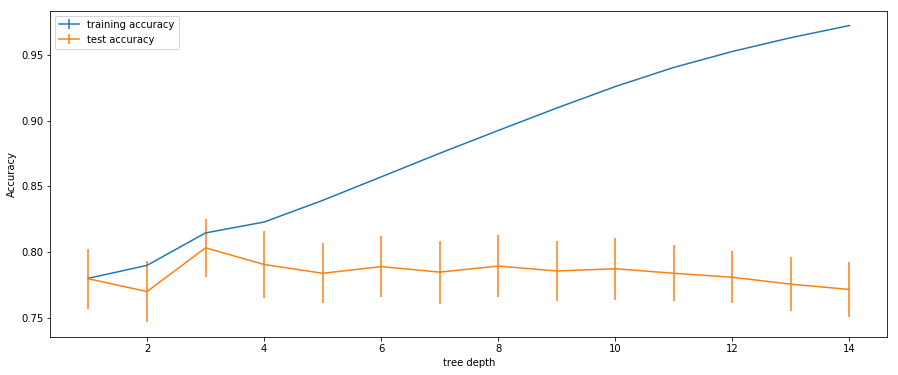

In [41]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("tree depth")
plt.legend()
bestdepth=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best Depth Parameter = %d" %bestdepth )

**From the accuracy vs tree depth chart above, we found that the ideal depth is tree which results in classification accuracy of 0.803.**

Below, we visualize the decision tree, the branches and the conditions per branch that splits the dataset.

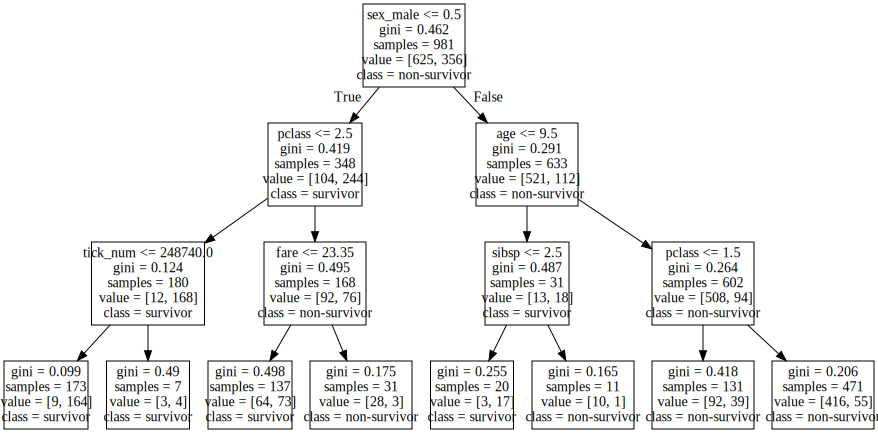

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

tree = DecisionTreeClassifier(
    max_depth=3, random_state=42)  # build the model
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="mytree.dot", class_names=["non-survivor", "survivor"],
                feature_names=X_clean.columns)

import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**The two highest predictors using a decision tree classifier are `sex` and `pclass.`**

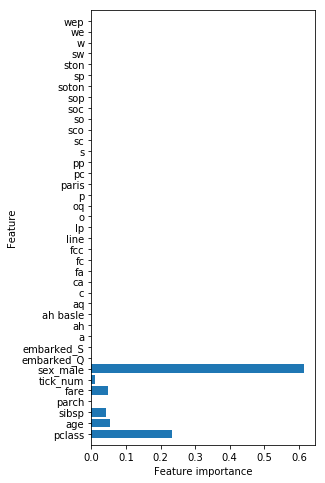

In [44]:
import numpy as np

def plot_feature_importances(model):
    plt.figure(figsize=(4, 8))
    n_features=len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances(tree)

### Random Forest



An aggregate of trees is called a forest. The same analogy goes for decision trees. A random forest is an aggregate of decision trees. The classification from a random forest is the result of many different decision trees.

In [45]:
from sklearn.ensemble import RandomForestClassifier

**Using a random forest classifier, we got an accuracy of 0.8079 which is higher than a single decision tree but not by much.**

In [46]:
X = X_clean
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.997961
accuracy on test set: 0.807927


The best predictors using a random forest classifier are `sex_male`, `tick_num`, `fare`, and `age`.

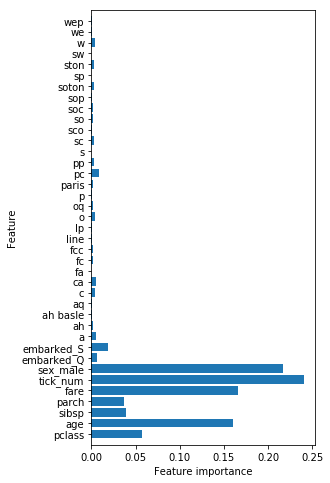

In [47]:
plot_feature_importances(forest)

### Gradient Boosting Machines

Gradient boosting machines (GBM) or gradient boosted regression trees work similarly to random forests, except that instead of randomizing decision trees, the algorithm starts with one shallow (depth typically around 5) decision tree and keeps adding decision trees that improve classification one after another. It's like a more guided random forest. 

The hyperparameters of GBM are learning rate (higher values are faster but may offshoot optimal accuracy) and maximum tree depth.

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

def run_gbm(lr, X):

    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()
    for seedN in range(1,50,1):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, 
                                                            test_size=0.10, random_state=seedN)

        training_accuracy = []
        test_accuracy = []
        maxdepth_settings = range(2, 8) # try n_neighbors from 1 to 50

        for depth in maxdepth_settings:

            tree = GradientBoostingClassifier(n_estimators=20, learning_rate=lr,
                                       max_depth=depth, random_state=42).fit(X_train, y_train) # build the model

            tree.fit(X_train, y_train)

            training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
            test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy

        lahat_training[seedN]=training_accuracy
        lahat_test[seedN] = test_accuracy
        
    
    fig = plt.figure(figsize=(15, 6))
    plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1),
                 yerr=lahat_training.std(axis=1), label="training accuracy")
    plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1),
                 yerr=lahat_test.std(axis=1), label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("depth")
    plt.legend()
    bestdepth=np.argmax(lahat_test.mean(axis=1))+1
    print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
    print("Best Depth Parameter = %d" %bestdepth )

**GBM results in the highest accuracy at the expense of interpretability.**

Highest Average Test Set Achieved = 0.810407
Best Depth Parameter = 2


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


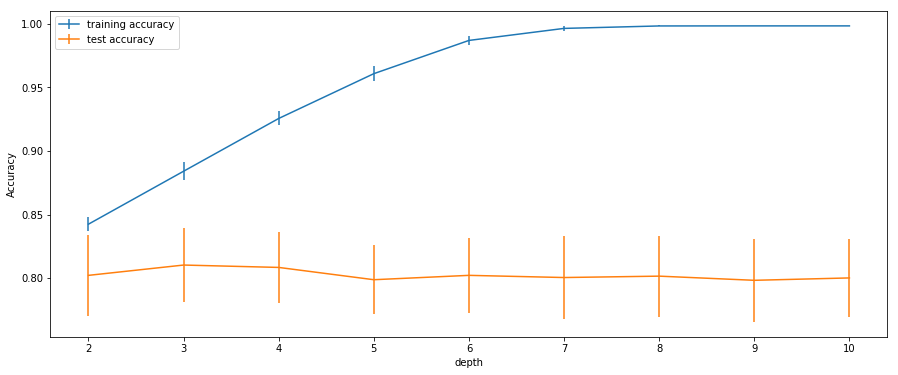

In [50]:
run_gbm(0.5, X)

Highest Average Test Set Achieved = 0.812588
Best Depth Parameter = 6


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


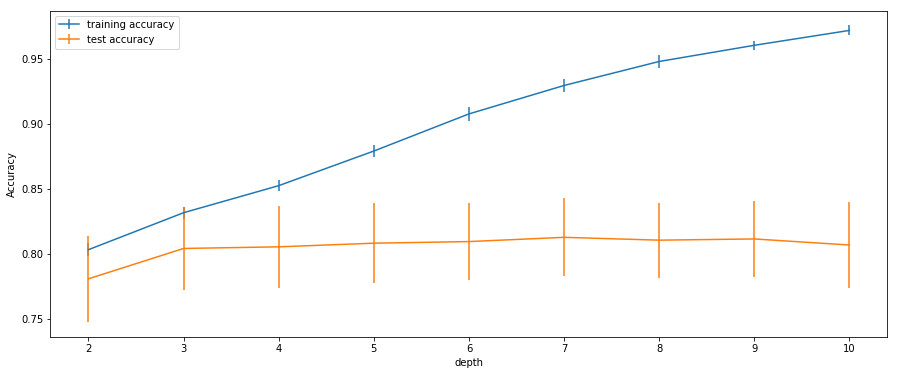

In [51]:
run_gbm(0.1, X)

/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Highest Average Test Set Achieved = 0.808537
Best Depth Parameter = 7


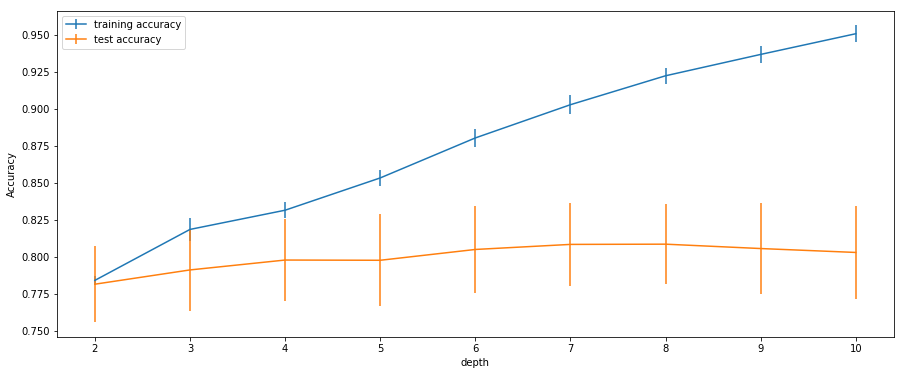

In [52]:
run_gbm(0.05, X)

### Rerunning GBM and Random Forests on Dimensionally-Reduced Dataset

We rerun gradient boosting machines and random forest classifiers for dimensionally-reduced matrix. This matrix was obtained by first scaling the original dataset using standard scaler. Afterwhich, singular value decomposition was applied to come up with principal components (new components made up of a combination of features) that explain 95% of the information.

As you will see, **running GBM and random forest classifier on dimensionally-reduced data reduced the accuracy of the classification model.**

#### Dimensionality Reduction

In [53]:
sc = StandardScaler()
Xsc = sc.fit_transform(X_clean)

We then performed dimensionality reduction to reduce the number of "features". It might be possible that only few of these features explain 95% of the information. In order to find out, we used a dimensionality reduction method. The method used here is singular value decomposition (SVD). Information about SVD can be found here http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm.

In [54]:
from sklearn.decomposition import TruncatedSVD

In [56]:
comps = Xsc.shape[1] - 1

svd = TruncatedSVD(n_components=comps)
X_svd = svd.fit_transform(Xsc)
var = svd.explained_variance_ratio_
c_var = var.cumsum()
c_var;

The variance or "information" explained per feature in the dimensionally-reduced matrix is shown in the first plot below. Notice that the first few features or principal components explain majority of the information. The second plot shows the cumulative information explained.

**95% of the information or variance is explained by 29 principal components.**

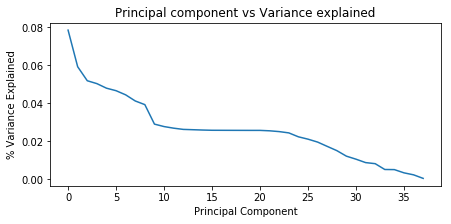

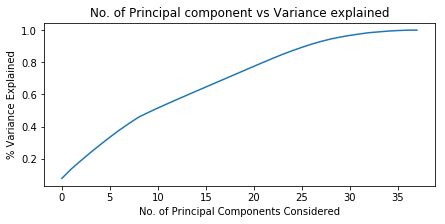

In [57]:
plt.figure(figsize = (7, 3))
plt.plot(var)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Principal component vs Variance explained')
plt.show()
plt.figure(figsize = (7, 3))
plt.plot(c_var)
plt.xlabel('No. of Principal Components Considered')
plt.title('No. of Principal component vs Variance explained')
plt.ylabel('% Variance Explained');

In [58]:
n_95 = [c_var < 0.95][0].sum()
n_95

29

Using 29 principal components, the new matrix is saved in `X_svd_2`.

In [59]:
svd = TruncatedSVD(n_components = n_95)
X_svd_2 = svd.fit_transform(Xsc)
X_svd_2.shape

(1309, 29)

In [60]:

X_train, X_test, y_train, y_test = train_test_split(X_svd_2, y, random_state=42)
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.997961
accuracy on test set: 0.759146


Highest Average Test Set Achieved = 0.792024
Best Depth Parameter = 1


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


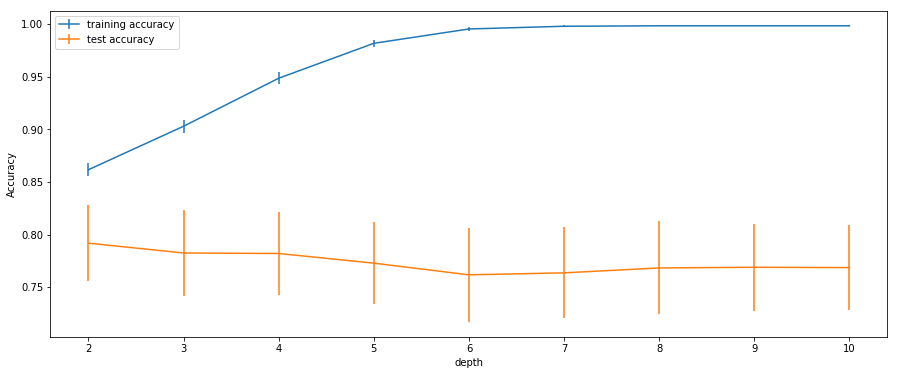

In [62]:
run_gbm(0.5, X_svd_2)

Highest Average Test Set Achieved = 0.795139
Best Depth Parameter = 4


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


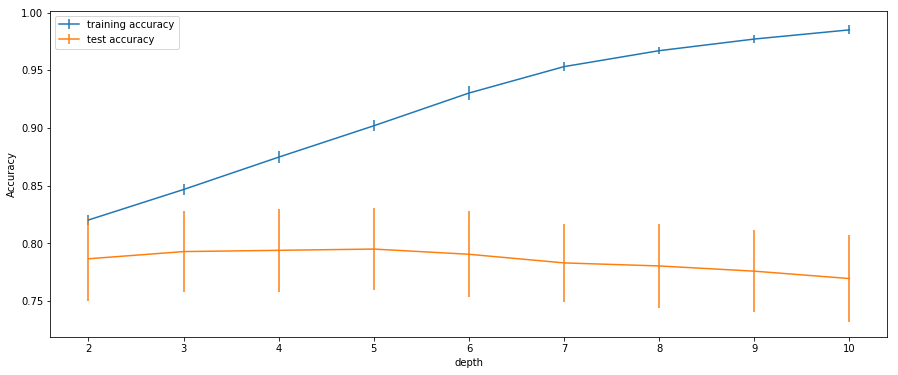

In [63]:
run_gbm(0.1, X_svd_2)

Highest Average Test Set Achieved = 0.792803
Best Depth Parameter = 4


/Users/fernandojavier/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


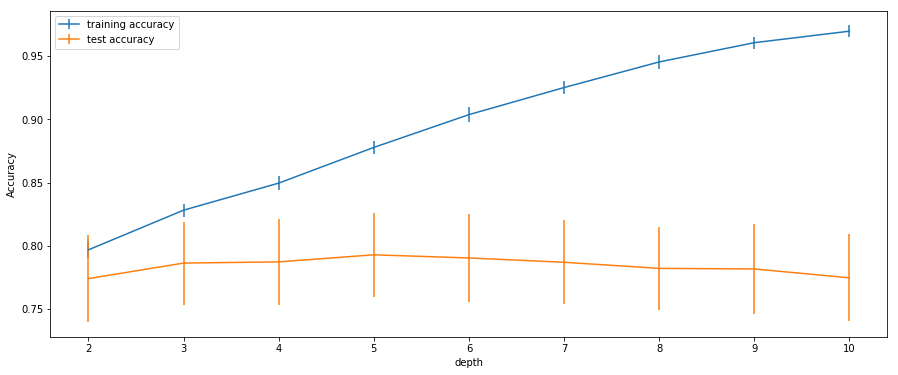

In [64]:
run_gbm(0.05, X_svd_2)

GBM and random forest classifier on dimensionally-reduced data reduced the accuracy of the classification model.

## Summary

Titanic dataset was provided by AIM ACCESS lab. The dataset was cleaned and run on multiple classification models with the goal of finding whether a person would survive in the Titanic accident or not. 

The model that yielded the highest accuracy was GBM with around 81% accuracy using learning rate of 0.1 and maximum depth of 6. However, the downside was it lacked interpretability. 

The model that yielded second best accuracy was random forest with accuracy of 80.8%. The highest predictors were ticket number and sex. 

The third was nonlinear SVM with RBF kernel and C=0.75 and min-max scaled dataset which yielded 80.8% accuracy. However, the best predictors were not determined for this model.

Fourth, decision tree yielded 80.3% accuracy at maximum depth of 3. The advantage of the decision tree was its interpretability as a tree diagram could be constructed of the step-by-step process in classification process.

Finally, the dataset was dimensionally reduced using SVD. GBM and random forest were rerun but it was shown that accuracies for both decreased.

From this analysis, it was found that sex was the highest predictor of whether or not a person would survive the accident. The proportion of females in the survivors were higher than the males, whereas the proportion of females in the non-survivors were much less than the males.

For the models, GBM proved most accurate in classifying and may be used if the goal is merely for prediction. However, for the balance between interpretability and prediction, decision trees classifier is deemed preferrable.

## Limitations and Recommendations


Feature engineering to improve accuracy may be explored in future analyses.

## References

<br>https://github.com/awesomedata/awesome-public-datasets/issues/351
<br>http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm

## Acknowledgements

I would like to acknowledge Prof. Prof. Monterola and Jude Teves, whose codes proved helpful for this analysis. As well as Prof. Legara for facilitating our laboratory class at AIM. 

I would also like to thank John Titus Jungao whose insights and comments proved valuable to improve this notebook.